In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Labelss.csv' ,encoding='utf-8')

Mounted at /content/drive


In [ ]:
df_shuffled = data.sample(frac=1, random_state=42)  # Use a specific random_state for reproducibility

# Save the shuffled DataFrame to a new CSV file
df_shuffled.to_csv('/content/drive/MyDrive/shuffled_output.csv', index=False)

print(f'Shuffled DataFrame saved to shuffleds_output.csv')

Shuffled DataFrame saved to shuffleds_output.csv


In [ ]:
!pip install wget
!pip install transformers

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=3038c6a23c21bc7590cb77e51a173ce4ca510961c51ade9200945f12497d702b
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.7 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings, wget
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from transformers import AutoTokenizer, TFDistilBertForSequenceClassification
from tensorflow.keras.utils import plot_model
from wordcloud import WordCloud
wget.download("https://raw.githubusercontent.com/yogawicaksana/helper_prabowo/main/helper_prabowo_ml.py",out="helper_prabowo_ml.py")
from helper_prabowo_ml import clean_html, remove_links, remove_special_characters, removeStopWords, remove_, remove_digits, lower, email_address, non_ascii, punct

print(df_shuffled.shape)

(7451, 3)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
column_to_delete = 'File Name'
df_shuffled.drop(column_to_delete, axis=1, inplace=True)

df_shuffled.head()

,Category,Text
1287,CONSTRUCTION,CONSTRUCTION WORKER\nProfessional Summary\nSki...
6061,SALES,SALES ASSOCIATE Responsible trainings am revis...
1978,AVIATION,AIRCRAFT SALES\nProfessional Summary\nI expect...
3269,DESIGNER,INTERIOR DESIGNER Summary Talented Designer an...
1038,FITNESS,BRANCH MANAGER\nSummary\nMore than 5 years suc...


<Axes: xlabel='count', ylabel='Category'>

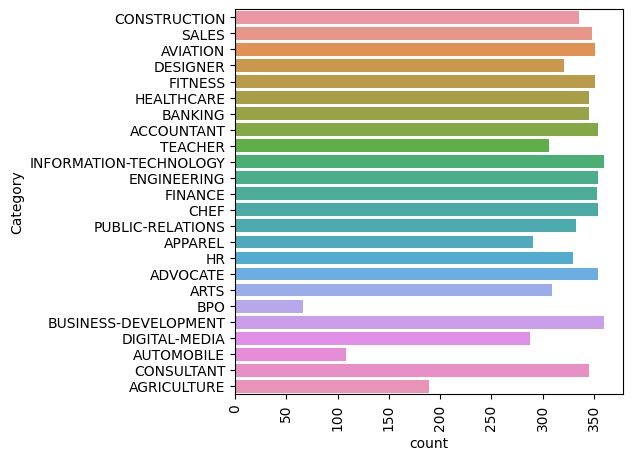

In [ ]:
import seaborn as sns
plt.figure(figsize = (5,5))
plt.xticks(rotation = 90)
sns.countplot(y = "Category" , data = df_shuffled)

In [ ]:
print("Total number of available jobs:", df_shuffled.Category.nunique())

Total number of available jobs: 24


In [ ]:
import pandas as pd


# List of categories to delete
categories_to_delete = ['BPO', 'AGRICULTURE', 'AUTOMOBILE']  # Replace with the categories you want to delete

# Filter out rows with the specified categories
filtered_df = df_shuffled[~df_shuffled['Category'].isin(categories_to_delete)]

# Save the modified data to a new CSV file
data = '/content/drive/MyDrive/filtered_data.csv'
filtered_df.to_csv(data, index=False)

print("Rows with specified categories deleted. Saved to", data)


Rows with specified categories deleted. Saved to /content/drive/MyDrive/filtered_data.csv


<Axes: xlabel='count', ylabel='Category'>

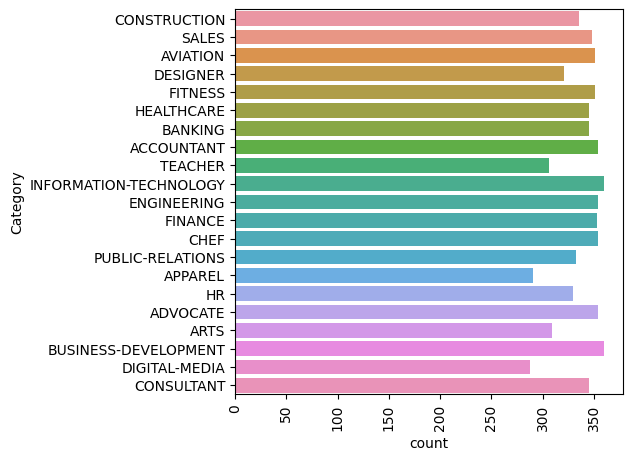

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/filtered_data.csv' ,encoding='utf-8')

import seaborn as sns
plt.figure(figsize = (5,5))
plt.xticks(rotation = 90)
sns.countplot(y = "Category" , data = data)

In [ ]:
print("Total number of available jobs:", data.Category.nunique())

Total number of available jobs: 21


In [ ]:
# Shuffle the rows
df = data.sample(frac=1, random_state=42)  # Use a specific random_state for reproducibility

# Save the shuffled DataFrame to a new CSV file
df.to_csv('/content/drive/MyDrive/shuffled1_output.csv', index=False)

print(f'Shuffled DataFrame saved to shuffled1_output.csv')

Shuffled DataFrame saved to shuffled1_output.csv


In [ ]:
labels_dict = {}

for idx, label in enumerate(df.Category.unique()):
    labels_dict[label] = idx

labels_dict

{'FITNESS': 0,
 'APPAREL': 1,
 'SALES': 2,
 'ACCOUNTANT': 3,
 'DIGITAL-MEDIA': 4,
 'BANKING': 5,
 'HEALTHCARE': 6,
 'AVIATION': 7,
 'PUBLIC-RELATIONS': 8,
 'INFORMATION-TECHNOLOGY': 9,
 'FINANCE': 10,
 'ARTS': 11,
 'CONSTRUCTION': 12,
 'ADVOCATE': 13,
 'DESIGNER': 14,
 'ENGINEERING': 15,
 'HR': 16,
 'CONSULTANT': 17,
 'BUSINESS-DEVELOPMENT': 18,
 'CHEF': 19,
 'TEACHER': 20}

In [ ]:
unique_categories = df['Category'].unique()

# Update labels_dict to include all unique categories
labels_dict = {category: idx for idx, category in enumerate(unique_categories)}

# Now, you can map the 'Category' column using the updated labels_dict
df.Category = df.Category.apply(func=lambda x: labels_dict[x])

In [ ]:
import numpy as np
df.Category = df.Category.astype(np.int64)

def text_preprocess(data,col):
    data[col] = data[col].apply(func=clean_html)
    data[col] = data[col].apply(func=remove_)
    data[col] = data[col].apply(func=removeStopWords)
    data[col] = data[col].apply(func=remove_digits)
    data[col] = data[col].apply(func=remove_links)
    data[col] = data[col].apply(func=remove_special_characters)
    data[col] = data[col].apply(func=punct)
    data[col] = data[col].apply(func=non_ascii)
    data[col] = data[col].apply(func=email_address)
    data[col] = data[col].apply(func=lower)
    return data


df['Text'] = df['Text'].astype(str)
preprocessed_df = text_preprocess(df,'Text')
preprocessed_df.head()

,Category,Text
4074,0,wellness director professional summary skills ...
6966,1,computer service maintain ability individual s...
711,2,sales associate summary dedicated sale familia...
3208,3,lead accountant highlights quickbooks peachtre...
2949,0,rehabilitation medicalspecialist massage thera...


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("manishiitg/distilbert-resume-parts-classify")
bert_model = TFDistilBertForSequenceClassification.from_pretrained("manishiitg/distilbert-resume-parts-classify",from_pt=True)

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [ ]:
preprocessed_df

,Category,Text
4074,0,wellness director professional summary skills ...
6966,1,computer service maintain ability individual s...
711,2,sales associate summary dedicated sale familia...
3208,3,lead accountant highlights quickbooks peachtre...
2949,0,rehabilitation medicalspecialist massage thera...
...,...,...
3772,19,business manager experience business manager c...
5191,2,coordinator service dedicated coordinator mult...
5226,8,vp public relations businessrelationship direc...
5390,9,information technology specialist duties certi...


In [ ]:
train_df, test_df = train_test_split(preprocessed_df,test_size=0.15,shuffle=True,random_state=101)

In [ ]:
max_resume_len = 200

X_train = tokenizer(text=train_df.Text.tolist(),
                   add_special_tokens=True,
                   padding=True,
                   truncation=True,
                   max_length=max_resume_len,
                   return_tensors='tf',
                   return_attention_mask=True,
                   return_token_type_ids=False,
                   verbose=1)

X_test = tokenizer(text=test_df.Text.tolist(),
                  add_special_tokens=True,
                  padding=True,
                  truncation=True,
                  max_length=max_resume_len,
                  return_tensors='tf',
                  return_attention_mask=True,
                  return_token_type_ids=False,
                  verbose=1)

In [ ]:
input_ids = Input(shape=(max_resume_len,),dtype=tf.int32,name='input_ids')
attention_masks = Input(shape=(max_resume_len,),dtype=tf.int32,name='attention_mask')

In [ ]:
word_embeddings = bert_model(input_ids,attention_mask=attention_masks)[0] # 0 --> final hidden state, 1 --> pooling output

output = Flatten()(word_embeddings)
output = Dense(units=1024,activation='relu')(output)
output = BatchNormalization()(output)
output = Dropout(0.25)(output)
output = Dense(units=512,activation='relu')(output)
output = Dropout(0.25)(output)
output = Dense(units=256,activation='relu')(output)
output = BatchNormalization()(output)
output = Dropout(0.25)(output)
output = Dense(units=128,activation='relu')(output)
output = Dropout(0.25)(output)
output = Dense(units=64,activation='relu')(output)
output = Dense(units=21,activation='softmax')(output)

model = Model(inputs=[input_ids,attention_masks],outputs=output)
model.layers

In [ ]:
model.layers[2].trainable = True
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 200)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 200)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_distil_bert_for_sequenc  TFSequenceClassifierOutput   6696270   ['input_ids[0][0]',           
 e_classification (TFDistil  (loss=None, logits=(None,    0          'attention_mask[0][0]']      
 BertForSequenceClassificat  12),                                                           

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5,
           epsilon=2e-8,
           clipnorm=1.0)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=SparseCategoricalAccuracy('balanced_accuracy'))

In [ ]:
es = EarlyStopping(monitor='val_balanced_accuracy',patience=250,verbose=1,mode='max',restore_best_weights=True)
mc = ModelCheckpoint('resume_parser.h5',monitor='val_balanced_accuracy',mode='max',verbose=1,save_best_only=True)

r = model.fit(x={'input_ids': X_train['input_ids'], 'attention_mask': X_train['attention_mask']},
             y=train_df.Category,
             epochs=100,
             batch_size=64,
             callbacks=[es,mc],
             validation_data=({'input_ids': X_test['input_ids'], 'attention_mask': X_test['attention_mask']},test_df.Category))


Epoch 1/100
95/95 [==============================] - ETA: 0s - loss: 3.3312 - balanced_accuracy: 0.0614
Epoch 1: val_balanced_accuracy improved from -inf to 0.06861, saving model to resume_parser.h5
95/95 [==============================] - 170s 1s/step - loss: 3.3312 - balanced_accuracy: 0.0614 - val_loss: 3.0116 - val_balanced_accuracy: 0.0686
Epoch 2/100
95/95 [==============================] - ETA: 0s - loss: 2.7637 - balanced_accuracy: 0.1539
Epoch 2: val_balanced_accuracy improved from 0.06861 to 0.27632, saving model to resume_parser.h5
95/95 [==============================] - 136s 1s/step - loss: 2.7637 - balanced_accuracy: 0.1539 - val_loss: 2.7163 - val_balanced_accuracy: 0.2763
Epoch 3/100
95/95 [==============================] - ETA: 0s - loss: 2.0581 - balanced_accuracy: 0.4163
Epoch 3: val_balanced_accuracy improved from 0.27632 to 0.71429, saving model to resume_parser.h5
95/95 [==============================] - 134s 1s/step - loss: 2.0581 - balanced_accuracy: 0.4163 - va

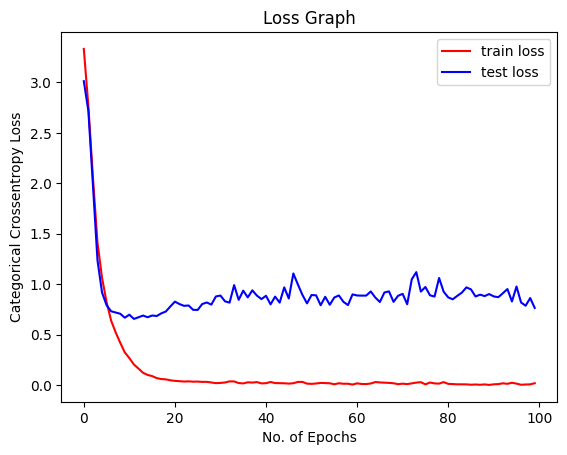

In [ ]:
plt.plot(r.history['loss'],'r',label='train loss')
plt.plot(r.history['val_loss'],'b',label='test loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Categorical Crossentropy Loss')
plt.title('Loss Graph')
plt.legend();


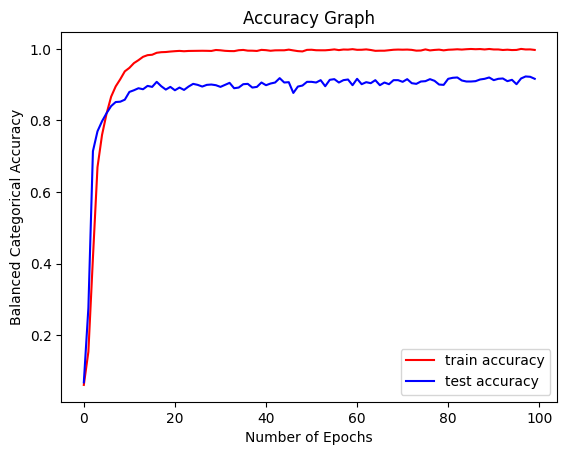

In [ ]:
plt.plot(r.history['balanced_accuracy'],'r',label='train accuracy')
plt.plot(r.history['val_balanced_accuracy'],'b',label='test accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Balanced Categorical Accuracy')
plt.title('Accuracy Graph')
plt.legend();

In [ ]:
loss, acc = model.evaluate({'input_ids': X_test['input_ids'], 'attention_mask': X_test['attention_mask']},test_df.Category)
print("Test Sparse Categorical Crossentropy Loss:", loss)
print("Test Balanced Categorical Accuracy:", acc)

34/34 [==============================] - 8s 221ms/step - loss: 0.7649 - balanced_accuracy: 0.9164
Test Sparse Categorical Crossentropy Loss: 0.7648603916168213
Test Balanced Categorical Accuracy: 0.9163534045219421


In [ ]:
test_predictions = model.predict({'input_ids': X_test['input_ids'], 'attention_mask': X_test['attention_mask']})
test_predictions = np.argmax(test_predictions,axis=1)

print("Classification Report:")
print(classification_report(test_df.Category,test_predictions))

34/34 [==============================] - 11s 217ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        60
           1       0.73      0.76      0.74        49
           2       0.94      0.88      0.91        51
           3       0.92      0.96      0.94        56
           4       0.94      0.98      0.96        47
           5       0.83      0.87      0.85        60
           6       0.91      0.79      0.85        52
           7       0.86      0.96      0.91        46
           8       0.97      0.87      0.92        45
           9       0.96      0.96      0.96        52
          10       0.91      0.93      0.92        54
          11       0.86      0.93      0.89        40
          12       0.98      1.00      0.99        55
          13       0.89      0.89      0.89        46
          14       0.92      0.98      0.95        50
          15       0.95      0.95      0.95        56
  

Confusion Matrix:


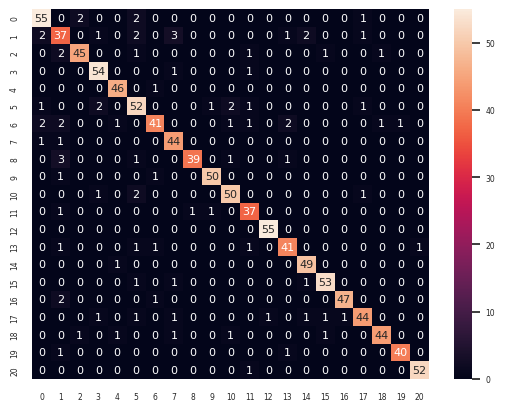

In [ ]:
print("Confusion Matrix:")
import seaborn as sn
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(test_df.Category,test_predictions)

sn.set(font_scale=0.5) # for label size
sn.heatmap(confusion_matrix, annot=True, annot_kws={"size": 8}) # font size

plt.show()